# Digit Recognition Using ANN

In this project, we classify hand-written digits from the MNIST dataset, a widely-used benchmark dataset containing 70,000 grayscale images of digits (28x28 pixels), representing numbers from 0 to 9

In [1]:
# Import necessary libraries
import tensorflow as tf

# Import MNIST dataset 
from tensorflow.keras.datasets import mnist  

In [2]:
# Load dataset
(x_train, y_train),(x, y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Split dataset into testing and validation data
from sklearn.model_selection import train_test_split

x_test,x_val,y_test,y_val = train_test_split(x,y,test_size=0.4,random_state=42)

In [4]:
# Print the shape of the train images dataset
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)


In [5]:
# Print the shape of the test images dataset
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

x_test shape: (6000, 28, 28)
y_test shape: (6000,)


In [6]:
# Print the shape of the val images dataset
print('x_val shape:',x_val.shape)
print('y_val shape:',y_val.shape)

x_val shape: (4000, 28, 28)
y_val shape: (4000,)


In [7]:
# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val/255.0

In [8]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

In [9]:
# Convert each 28×28 image into a single-dimensional array of 784 pixels.

x_train = x_train.reshape(len(x_train),28*28)
x_test = x_test.reshape(len(x_test),28*28)
x_val = x_val.reshape(len(x_val),28*28)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Dropout

In [11]:
# Build the ANN model
ann_model = Sequential()

ann_model.add(Input(shape=(28*28,)))
ann_model.add(Dense(256, activation='relu'))
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(10, activation='softmax'))

In [12]:
# Compile the ANN model
History = ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [13]:
# Train the ANN model
History=ann_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val,y_val))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8880 - loss: 0.3661 - val_accuracy: 0.9635 - val_loss: 0.1297
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9712 - loss: 0.0910 - val_accuracy: 0.9670 - val_loss: 0.1125
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9803 - loss: 0.0613 - val_accuracy: 0.9705 - val_loss: 0.1028
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9868 - loss: 0.0418 - val_accuracy: 0.9745 - val_loss: 0.0876
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9894 - loss: 0.0339 - val_accuracy: 0.9750 - val_loss: 0.0924
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9895 - loss: 0.0322 - val_accuracy: 0.9740 - val_loss: 0.0954
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9924 - loss: 0.0244 - val_accuracy: 0.9795 - val_loss: 0.0945
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9928 - loss: 0.0214 - 

In [14]:
# Assuming you have a trained model and test data
loss, accuracy = ann_model.evaluate(x_test, y_test, verbose=1)
print(f"Loss: {loss}, Accuracy: {accuracy*100}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9807 - loss: 0.0829
Loss: 0.08387428522109985, Accuracy: 98.18333387374878


# Classification Report

In [15]:
from sklearn.metrics import classification_report
# Predict probabilities for the test set
y_pred = ann_model.predict(x_test)

# Convert probabilities to class labels
y_pred = y_pred.argmax(axis=1)  # Predicted labels
y_true = y_test.argmax(axis=1)  # True labels (convert one-hot to labels)


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [16]:
# Generate the classification report
report = classification_report(y_true, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       599
           1       0.99      0.99      0.99       686
           2       0.99      0.98      0.98       609
           3       0.98      0.98      0.98       600
           4       0.99      0.97      0.98       569
           5       0.99      0.98      0.98       558
           6       0.97      0.99      0.98       560
           7       0.98      0.98      0.98       630
           8       0.98      0.98      0.98       591
           9       0.99      0.98      0.98       598

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



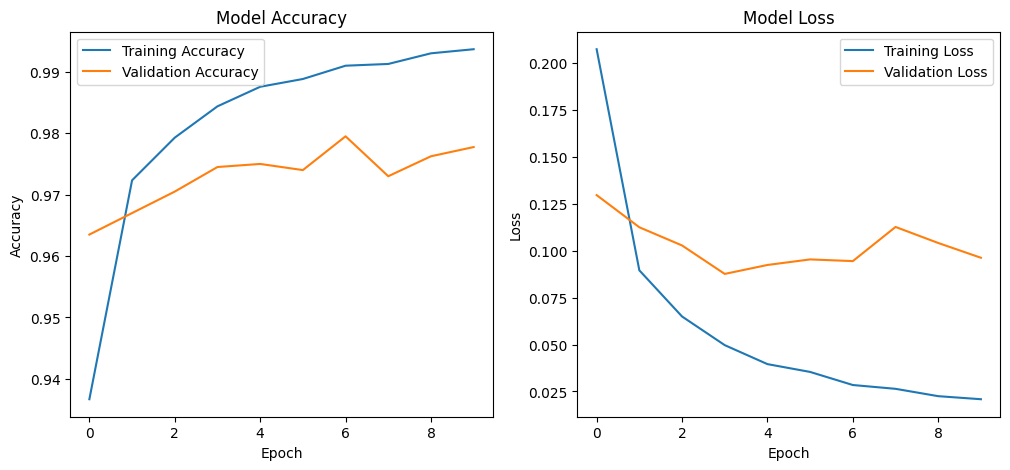

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(History.history['accuracy'], label='Training Accuracy')
plt.plot(History.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(History.history['loss'], label='Training Loss')
plt.plot(History.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


In [19]:
# Save the full model
ann_model.save("digit_classificatin.keras")
ann_model.save("digit_classificatin.h5")

# * * * * * * * * * * * * * * * * * * * * * * * * THE END * * * * * * * * * * * * * * * * * * * * * * * * * * * 